In [1]:
# Appling the decision tree classifier on car_evaluation.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation.csv', names=column_names)
df.head(20)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
numeric_columns = ['doors', 'persons']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical_columns = ['buying', 'maint', 'lug_boot', 'safety', 'class']
df = pd.get_dummies(df, columns=categorical_columns)

In [4]:
df.head(20)

,doors,persons,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,2.0,2.0,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False
1,2.0,2.0,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,2.0,2.0,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False
3,2.0,2.0,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False
4,2.0,2.0,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False
5,2.0,2.0,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False
6,2.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False
7,2.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False
8,2.0,2.0,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False
9,2.0,4.0,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False


In [5]:
features = df.drop([col for col in df.columns if col.startswith('class_')], axis=1)
target = df[[col for col in df.columns if col.startswith('class_')]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)


In [7]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
# y_train.values.ravel() returns a 1D array with all the values in y_train,
# but because y_train is multi-column, it has more values than samples in X_train.
# Instead, select one column as the target variable. For example, if 'class_unacc' is the column representing the target:
dt.fit(X_train, y_train['class_unacc'])

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


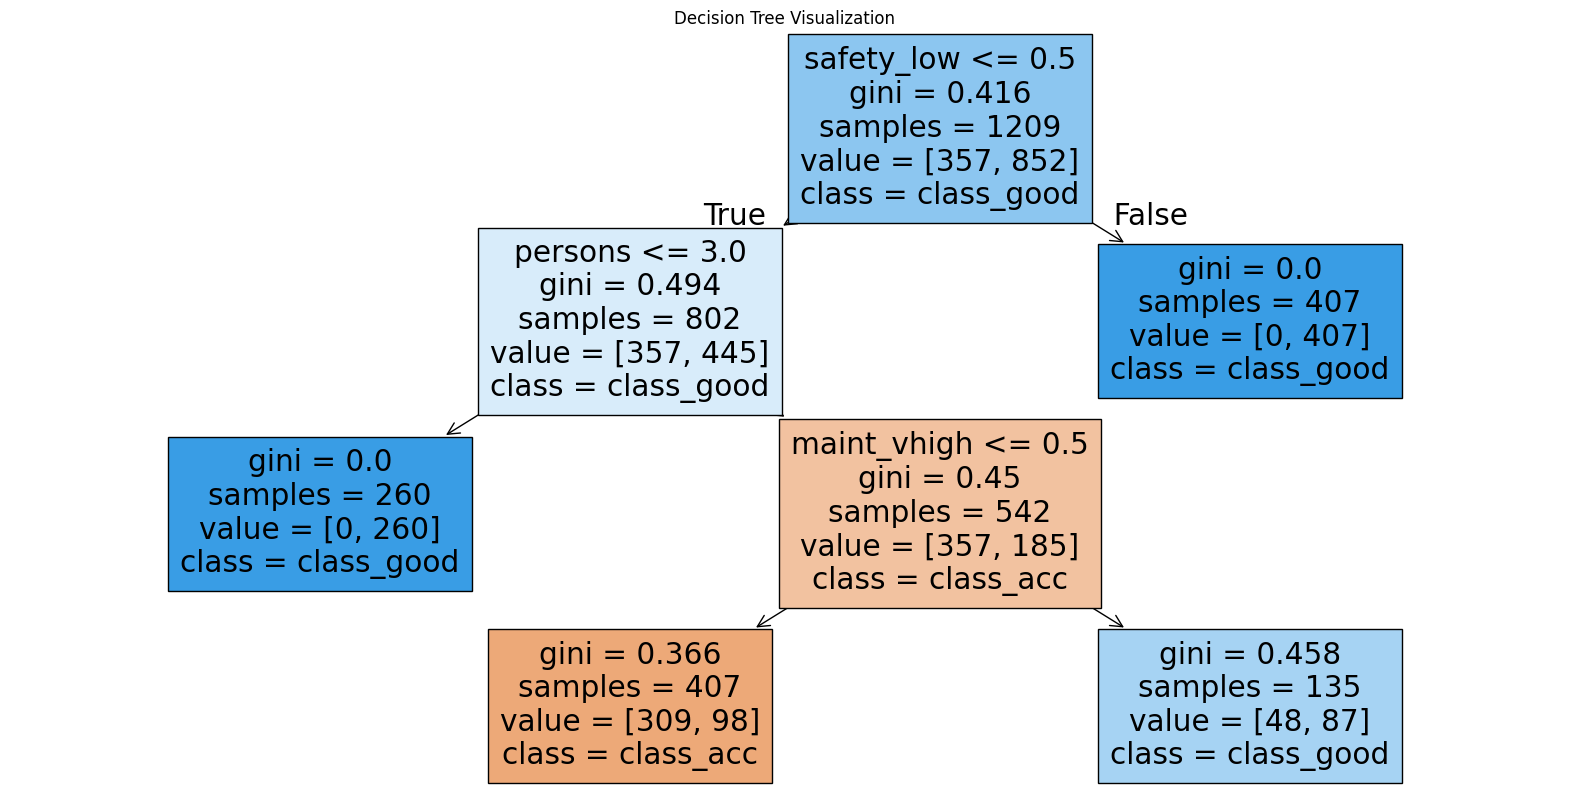

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features.columns, class_names=[str(cls) for cls in y_train.columns], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [9]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Convert y_train and y_test to a single-column format by selecting the desired target class.
# For example, if 'class_unacc' is the target class:
y_train_target = y_train['class_unacc']
y_test_target = y_test['class_unacc']

print("Training Accuracy:", accuracy_score(y_train_target, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train_target, y_train_pred))
print("\nTesting Accuracy:", accuracy_score(y_test_target, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test_target, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test_target, y_test_pred))

Training Accuracy: 0.8792390405293631
Training Confusion Matrix:
 [[309  48]
 [ 98 754]]

Testing Accuracy: 0.8921001926782274
Testing Confusion Matrix:
 [[137  24]
 [ 32 326]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.85      0.83       161
        True       0.93      0.91      0.92       358

    accuracy                           0.89       519
   macro avg       0.87      0.88      0.88       519
weighted avg       0.89      0.89      0.89       519



In [10]:
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# Instead of using y_train.values.ravel(), select one column as the target variable:
grid_search.fit(X_train, y_train['class_unacc'])
# If 'class_unacc' is your desired target class.

print("Best parameters from GridSearchCV:", grid_search.best_params_)

best_dt = grid_search.best_estimator_
y_test_best = best_dt.predict(X_test)

# When calculating accuracy and confusion matrix, use the corresponding target column:
print("\nTesting Accuracy with Best Estimator:", accuracy_score(y_test['class_unacc'], y_test_best))
print("Testing Confusion Matrix with Best Estimator:\n", confusion_matrix(y_test['class_unacc'], y_test_best))

Best parameters from GridSearchCV: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

Testing Accuracy with Best Estimator: 0.976878612716763
Testing Confusion Matrix with Best Estimator:
 [[154   7]
 [  5 353]]
